# Lending Club Data - Predicting Loan Defaults

In [186]:
# importing necessary modules
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime

In [187]:
# load data
df = pd.read_csv("../../../Documents/loan.csv", index_col=0)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [188]:
df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
id,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Wrangling

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887379 entries, 1077501 to 36271262
Data columns (total 73 columns):
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835922 non-null object
emp_length                     887379 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status                    887379 non-null object
pymnt_plan  

In [190]:
# removing months from term
df.term = df.term.str.replace('months', '')

In [191]:
df.term.head()

id
1077501     36 
1077430     60 
1077175     36 
1076863     36 
1075358     60 
Name: term, dtype: object

In [192]:
# changing into int type
df.term = df.term.astype(int)

In [193]:
df.grade.value_counts()

B    254535
C    245860
A    148202
D    139542
E     70705
F     23046
G      5489
Name: grade, dtype: int64

In [194]:
# changing into numerical data type
df.grade.replace(['A', 'B', 'C', 'D', 'E', 'F', 'G'], [6, 5, 4, 3, 2, 1, 0], inplace=True)
df.grade.value_counts()

5    254535
4    245860
6    148202
3    139542
2     70705
1     23046
0      5489
Name: grade, dtype: int64

In [195]:
# changing into categorical type
df.grade = df.grade.astype('category')

In [196]:
df.sub_grade.value_counts()

B3    56323
B4    55626
C1    53387
C2    52236
C3    50161
C4    48857
B5    48833
B2    48781
B1    44972
A5    44816
C5    41219
D1    36238
A4    34531
D2    29803
D3    26554
D4    25558
A3    23457
A1    22913
A2    22485
D5    21389
E1    18268
E2    17004
E3    14134
E4    11724
E5     9575
F1     7218
F2     5392
F3     4433
F4     3409
F5     2594
G1     1871
G2     1398
G3      981
G4      663
G5      576
Name: sub_grade, dtype: int64

In [197]:
# changing into numerical data type
df.sub_grade.replace(['A1','A2','A3','A4','A5',
                      'B1','B2','B3','B4','B5',
                      'C1','C2','C3','C4','C5',
                      'D1','D2','D3','D4','D5',
                      'E1','E2','E3','E4','E5',
                      'F1','F2','F3','F4','F5',
                      'G1','G2','G3','G4','G5'],
                     range(1,36), inplace=True)

# changing into categorical type
df.sub_grade = df.sub_grade.astype('category')

In [198]:
df.sub_grade.value_counts()

8     56323
9     55626
11    53387
12    52236
13    50161
14    48857
10    48833
7     48781
6     44972
5     44816
15    41219
16    36238
4     34531
17    29803
18    26554
19    25558
3     23457
1     22913
2     22485
20    21389
21    18268
22    17004
23    14134
24    11724
25     9575
26     7218
27     5392
28     4433
29     3409
30     2594
31     1871
32     1398
33      981
34      663
35      576
Name: sub_grade, dtype: int64

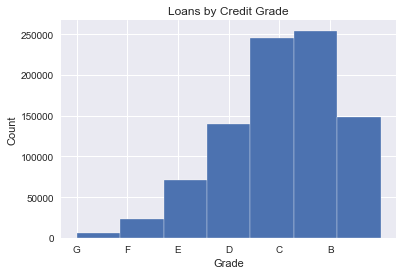

In [199]:
sns.set()
df.grade.hist(bins=7, edgecolor='w')
plt.xticks(range(0,6), ['G','F','E','D','C','B','A'])
plt.title('Loans by Credit Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()

In [200]:
df.emp_length.value_counts()

10+ years    291569
2 years       78870
< 1 year      70605
3 years       70026
1 year        57095
5 years       55704
4 years       52529
n/a           44825
7 years       44594
8 years       43955
6 years       42950
9 years       34657
Name: emp_length, dtype: int64

In [201]:
df.emp_length.replace(['10+ years', '2 years', '< 1 year', '3 years', '1 year',
                      '5 years', '4 years', '', '7 years', '8 years', '6 years', '9 years'], 
                      [10, 2, 0, 3, 1, 5, 4, 0, 7, 8, 6, 9], inplace=True)

In [224]:
df.emp_length = df.emp_length.astype('category')
df.emp_length.value_counts()

10     77726
2      23996
0      21447
3      20750
5      18308
1      17299
4      16468
6      14960
7      14256
8      12029
n/a    10002
9       9698
Name: emp_length, dtype: int64

In [203]:
df.home_ownership.value_counts()

MORTGAGE    443557
RENT        356117
OWN          87470
OTHER          182
NONE            50
ANY              3
Name: home_ownership, dtype: int64

In [204]:
df.home_ownership.replace(['OWN', 'MORTGAGE', 'RENT', 'OTHER', 'NONE', 'ANY'], [3,2,1,0,0,0], inplace=True)
df.home_ownership = df.home_ownership.astype('category')

In [205]:
df.home_ownership.value_counts()

2    443557
1    356117
3     87470
0       235
Name: home_ownership, dtype: int64

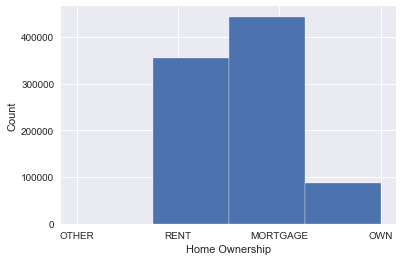

In [206]:
sns.set()
df.home_ownership.hist(bins=4, edgecolor='w')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.xticks([0,1,2,3], ['OTHER','RENT','MORTGAGE','OWN'])
plt.show()

In [207]:
df.verification_status.value_counts()

Source Verified    329558
Verified           291071
Not Verified       266750
Name: verification_status, dtype: int64

In [208]:
df.verification_status.replace(['Source Verified', 'Verified', 'Not Verified'], [1,1,0], inplace=True)
df.verification_status = df.verification_status.astype('category')

In [209]:
df.verification_status.value_counts()

1    620629
0    266750
Name: verification_status, dtype: int64

In [212]:
df.issue_d = pd.to_datetime(df.issue_d)

In [213]:
df.issue_d.head()

id
1077501   2011-12-01
1077430   2011-12-01
1077175   2011-12-01
1076863   2011-12-01
1075358   2011-12-01
Name: issue_d, dtype: datetime64[ns]

In [214]:
df.loan_status.value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [215]:
# selecting and encoding fully paid and defaulted loans only
df.loan_status.replace(['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid', 'Charged Off', 
                        'Default', 'Does not meet the credit policy. Status:Charged Off'], [0, 0, 1, 1, 1],
                       inplace=True)

In [216]:
# dropping loans that are still active and not mature yet
df = df.loc[df['loan_status'].isin([0, 1])]

In [239]:
df.loan_status = df.loan_status.astype('category')
df.loan_status.value_counts()

0    209711
1     47228
Name: loan_status, dtype: int64

**Created two classes:**
* 0: Paid in Full
* 1: Defaulted

In [218]:
df.pymnt_plan.value_counts()

n    256937
y         2
Name: pymnt_plan, dtype: int64

In [219]:
df.pymnt_plan.replace(['n', 'y'], [0, 1], inplace=True)
df.pymnt_plan = df.pymnt_plan.astype('category')
df.pymnt_plan.value_counts()

0    256937
1         2
Name: pymnt_plan, dtype: int64

In [220]:
# dropping columns that are not useful
df = df.drop(['url', 'initial_list_status', 'last_credit_pull_d', 'policy_code', 'zip_code', 'addr_state'], axis=1)

In [226]:
df = df.drop(['issue_d'], axis=1)

In [228]:
df = df.drop(['title', 'desc'], axis=1)

In [231]:
df = df.drop(['emp_title', 'next_pymnt_d', 'last_pymnt_d', 'annual_inc_joint', 'dti_joint',
              'verification_status_joint'], axis=1)

In [233]:
df = df.drop(['member_id'], axis=1)

In [235]:
df.purpose.value_counts()

debt_consolidation    150253
credit_card            50649
home_improvement       15190
other                  14766
major_purchase          6402
small_business          4926
car                     3720
medical                 2927
moving                  2085
wedding                 2011
house                   1703
vacation                1615
educational              422
renewable_energy         270
Name: purpose, dtype: int64

In [237]:
df = df.drop(['purpose', 'application_type'], axis=1)

In [241]:
df.earliest_cr_line.head()

id
1077501    Jan-1985
1077430    Apr-1999
1077175    Nov-2001
1076863    Feb-1996
1075269    Nov-2004
Name: earliest_cr_line, dtype: object

In [242]:
df.earliest_cr_line = pd.to_datetime(df.earliest_cr_line)

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256939 entries, 1077501 to 36260758
Data columns (total 55 columns):
loan_amnt                      256939 non-null float64
funded_amnt                    256939 non-null float64
funded_amnt_inv                256939 non-null float64
term                           256939 non-null int64
int_rate                       256939 non-null float64
installment                    256939 non-null float64
grade                          256939 non-null category
sub_grade                      256939 non-null category
emp_length                     256939 non-null category
home_ownership                 256939 non-null category
annual_inc                     256935 non-null float64
verification_status            256939 non-null category
loan_status                    256939 non-null category
pymnt_plan                     256939 non-null category
dti                            256939 non-null float64
delinq_2yrs                    256910 non-null floa

In [244]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
id,,,,,,,,,,,,,,,,,,,,,
1077501,5000.0,5000.0,4975.0,36,10.65,162.87,5,7,10,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1077430,2500.0,2500.0,2500.0,60,15.27,59.83,4,14,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1077175,2400.0,2400.0,2400.0,36,15.96,84.33,4,15,10,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1076863,10000.0,10000.0,10000.0,36,13.49,339.31,4,11,10,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1075269,5000.0,5000.0,5000.0,36,7.90,156.46,6,4,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [249]:
sum(df.loan_amnt != df.funded_amnt)

1914

In [250]:
sum(df.funded_amnt != df.funded_amnt_inv)

46553

In [251]:
sum(df.funded_amnt - df.funded_amnt_inv)

30665038.139082015

In [252]:
sum(df.loan_amnt - df.funded_amnt)

10822350.0

In [253]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,256939.000000,256939.000000,256939.000000,256939.000000,256939.000000,256939.000000,2.569350e+05,256939.000000,256910.000000,256910.000000,...,144.000000,126.000000,144.000000,144.000000,144.000000,144.000000,1.904640e+05,144.000000,144.000000,144.000000
mean,13522.115950,13479.995641,13360.648099,41.336177,13.780014,416.923016,7.249885e+04,16.534986,0.250411,0.887821,...,36462.312500,73.657937,1.673611,3.555556,5517.340278,58.945139,2.969485e+04,1.256944,2.097222,2.625000
std,8128.811481,8106.456843,8141.904114,9.979672,4.389704,244.878760,5.890043e+04,7.793541,0.742431,1.158745,...,38137.563875,23.074812,1.629406,2.932284,4507.604776,20.356957,2.949980e+04,1.792551,3.903234,4.057067
min,500.000000,500.000000,0.000000,36.000000,5.320000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,7.900000,0.000000e+00,0.000000,0.000000,-4.000000
25%,7200.000000,7200.000000,7100.000000,36.000000,10.740000,238.130000,4.500000e+04,10.740000,0.000000,0.000000,...,10763.750000,63.350000,0.000000,2.000000,2091.250000,46.825000,1.330000e+04,0.000000,0.000000,1.000000
50%,12000.000000,12000.000000,11950.000000,36.000000,13.550000,364.290000,6.200000e+04,16.200000,0.000000,1.000000,...,23605.000000,77.050000,1.000000,3.000000,4511.500000,61.950000,2.230000e+04,1.000000,0.000000,2.000000
75%,18200.000000,18000.000000,18000.000000,36.000000,16.550000,546.430000,8.700000e+04,21.990000,0.000000,1.000000,...,50835.750000,88.250000,2.000000,5.000000,8212.750000,74.225000,3.680000e+04,1.000000,2.000000,4.000000
max,35000.000000,35000.000000,35000.000000,60.000000,28.990000,1424.570000,8.706582e+06,57.140000,29.000000,33.000000,...,249212.000000,129.200000,8.000000,21.000000,22279.000000,102.800000,2.013133e+06,9.000000,21.000000,19.000000


In [254]:
df = df.drop(['loan_amnt', 'funded_amnt_inv'], axis=1)

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256939 entries, 1077501 to 36260758
Data columns (total 53 columns):
funded_amnt                    256939 non-null float64
term                           256939 non-null int64
int_rate                       256939 non-null float64
installment                    256939 non-null float64
grade                          256939 non-null category
sub_grade                      256939 non-null category
emp_length                     256939 non-null category
home_ownership                 256939 non-null category
annual_inc                     256935 non-null float64
verification_status            256939 non-null category
loan_status                    256939 non-null category
pymnt_plan                     256939 non-null category
dti                            256939 non-null float64
delinq_2yrs                    256910 non-null float64
earliest_cr_line               256910 non-null datetime64[ns]
inq_last_6mths                 256910 non-nu